In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [6]:
df=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep="\t")

# Data Cleaning

In [114]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenses,totalKid
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,1


In [16]:
#percentage of missing cols
for col in df.columns:
    pt_missing= np.mean(df[col].isnull())
    print("{}- {}%".format(col,pt_missing))

ID- 0.0%
Year_Birth- 0.0%
Education- 0.0%
Marital_Status- 0.0%
Income- 0.010714285714285714%
Kidhome- 0.0%
Teenhome- 0.0%
Dt_Customer- 0.0%
Recency- 0.0%
MntWines- 0.0%
MntFruits- 0.0%
MntMeatProducts- 0.0%
MntFishProducts- 0.0%
MntSweetProducts- 0.0%
MntGoldProds- 0.0%
NumDealsPurchases- 0.0%
NumWebPurchases- 0.0%
NumCatalogPurchases- 0.0%
NumStorePurchases- 0.0%
NumWebVisitsMonth- 0.0%
AcceptedCmp3- 0.0%
AcceptedCmp4- 0.0%
AcceptedCmp5- 0.0%
AcceptedCmp1- 0.0%
AcceptedCmp2- 0.0%
Complain- 0.0%
Z_CostContact- 0.0%
Z_Revenue- 0.0%
Response- 0.0%


In [19]:
# sum of missing value in Income col
df["Income"].isnull().sum()

24

In [24]:
# filling missing value with zero
df["Income"] = df["Income"].fillna(0)

In [115]:
# changing the data type of Income col 
df["Income"]=df["Income"].astype("int64")
# changing the data type of data types of dt_customer 
df["Dt_Customer"]= pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y").dt.date


In [116]:
#Extracting the Year from Dt_customer
df["Dt_Customer_Year"]=pd.to_datetime(df["Dt_Customer"]).dt.year

In [117]:
# Age column
df["Age"]=df["Dt_Customer_Year"]-df["Year_Birth"]

In [118]:
# Dropping the data of the logical impossible age to buy things 
df = df.drop(df[df["Age"] > 100].index)

In [26]:
# Expenses col for all the purchase 
df["Expenses"]=df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [27]:
#total kids in home
df["totalKid"]=df["Kidhome"]+df["Teenhome"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Expenses,totalKid
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2237 non-null   int64 
 1   Year_Birth           2237 non-null   int64 
 2   Education            2237 non-null   object
 3   Marital_Status       2237 non-null   object
 4   Income               2237 non-null   int64 
 5   Kidhome              2237 non-null   int64 
 6   Teenhome             2237 non-null   int64 
 7   Dt_Customer          2237 non-null   object
 8   Recency              2237 non-null   int64 
 9   MntWines             2237 non-null   int64 
 10  MntFruits            2237 non-null   int64 
 11  MntMeatProducts      2237 non-null   int64 
 12  MntFishProducts      2237 non-null   int64 
 13  MntSweetProducts     2237 non-null   int64 
 14  MntGoldProds         2237 non-null   int64 
 15  NumDealsPurchases    2237 non-null   int64 
 16  NumWeb

# Data Exploration/Analysis

In [28]:
#import important libraries
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
 # Adjust the cofiguration of the plots we will create


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


kids and eduction analysis

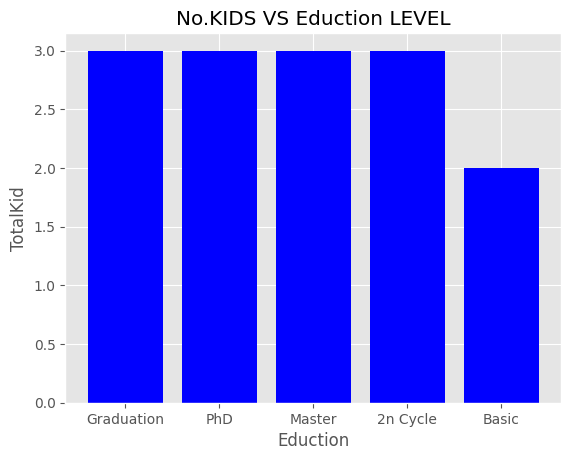

In [53]:
df_sorted = df.sort_values(by="totalKid", ascending=False)


plt.bar(df_sorted["Education"],df_sorted["totalKid"],color="Blue")
plt.xlabel("Eduction")
plt.ylabel("TotalKid")
plt.title("No.KIDS VS Eduction LEVEL")
plt.show()

In [82]:
df["totalKid"].max()

3

In [84]:
df["totalKid"].mean()

0.9508270004470273

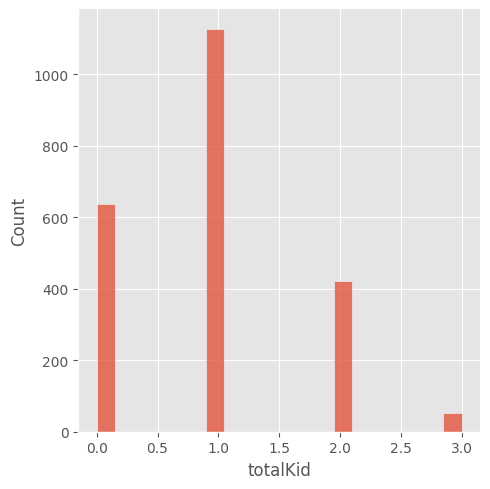

In [94]:
# kid volume
sns.displot(df["totalKid"])

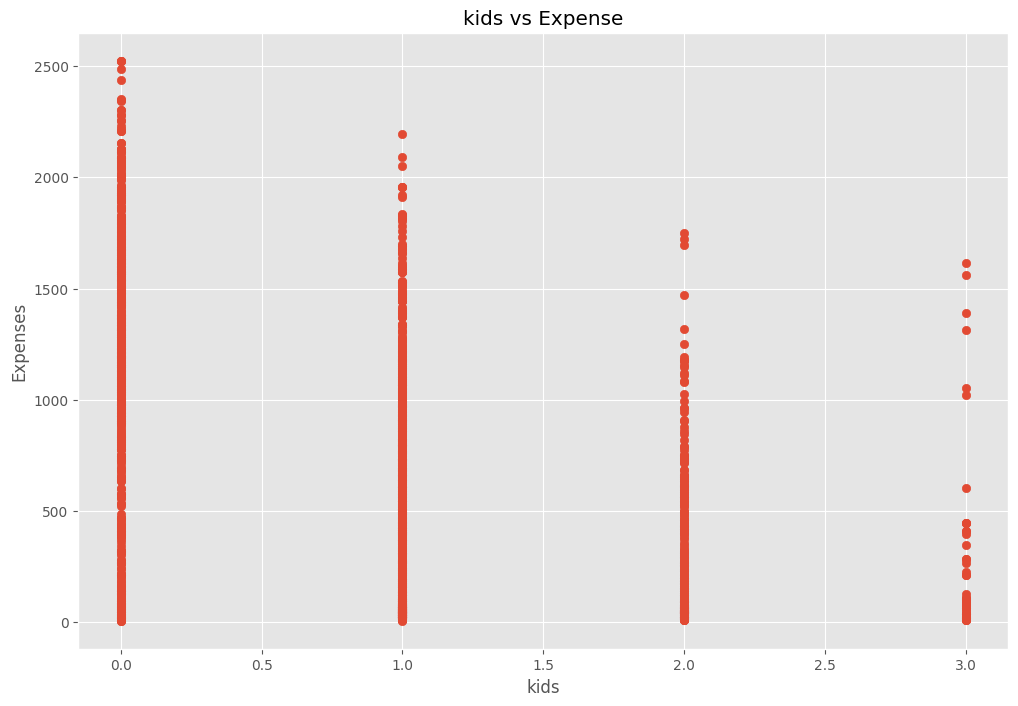

In [101]:
#  scatter plot between kids and expenses 
plt.scatter(x=df['totalKid'],y=df["Expenses"])
plt.title("kids vs Expense")
plt.xlabel("kids")
plt.ylabel("Expenses") 
plt.show()

<AxesSubplot: xlabel='totalKid', ylabel='Expenses'>

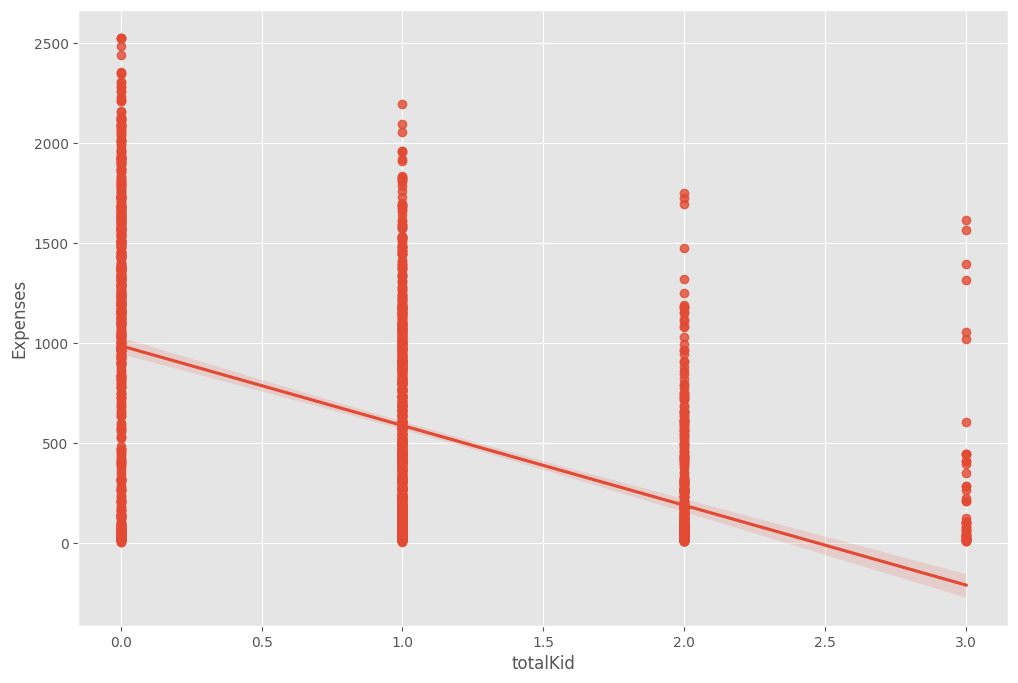

In [112]:
#plot kid vs expenses using seaborn correlation

sns.regplot(x='totalKid',y='Expenses',data=df)

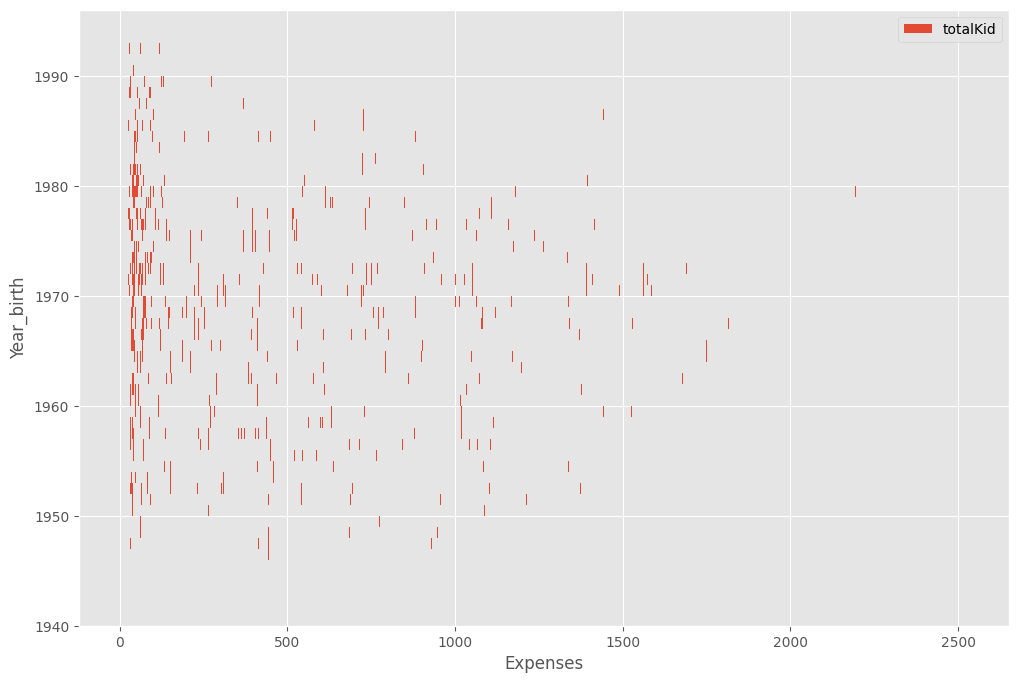

In [108]:
fig, ax = plt.subplots()
ax.bar(df["Expenses"], df["totalKid"], bottom=df["Year_Birth"], label="totalKid")

ax.set_xlabel("Expenses")
ax.set_ylabel("Year_birth")
ax.legend()

plt.show()

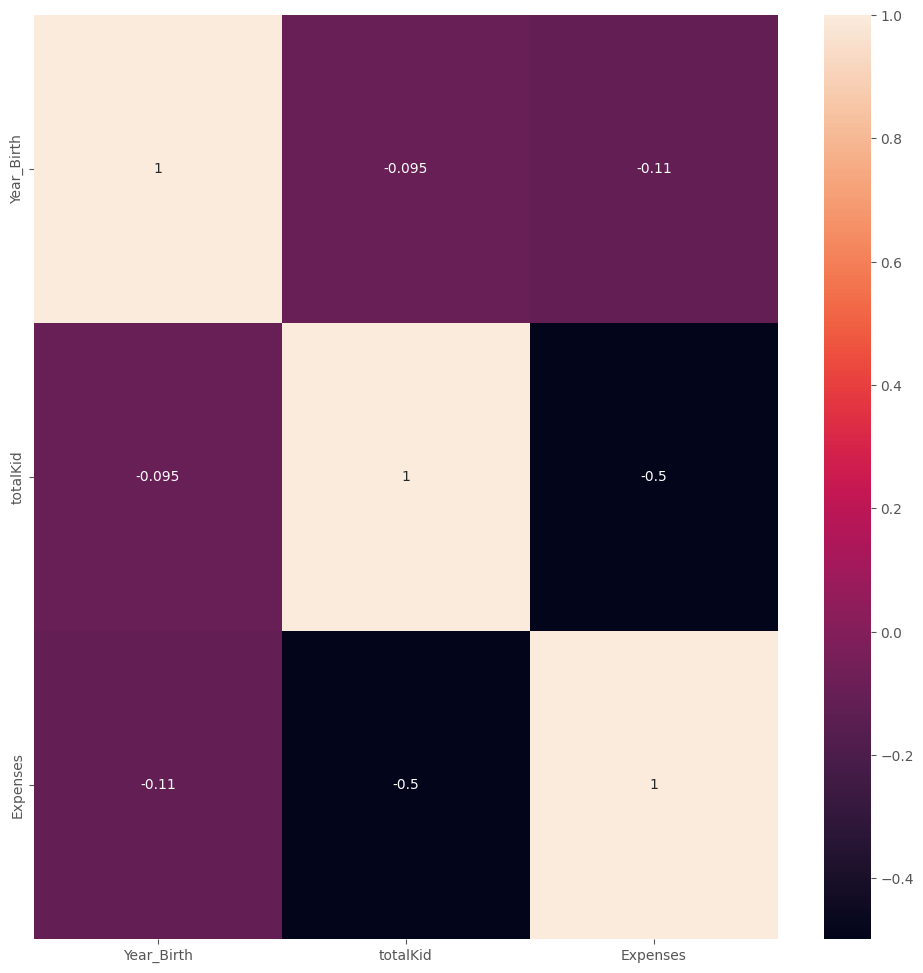

<Figure size 1200x1200 with 0 Axes>

In [143]:
#correlation between total_kid year_Birth and expenses
selected_cols = ["Year_Birth", "totalKid", "Expenses"]
correlation_mat=df[selected_cols].corr(method="pearson")
sns.heatmap(correlation_mat,annot=True)
plt.figure(figsize=(12,12))
plt.show()


In [ ]:
# so we saw that kid and expenses has highly negative correlation even if do this with kidhome or teenhome
#Purchase does not depend upon the kids 

# # Mnt wines analysis

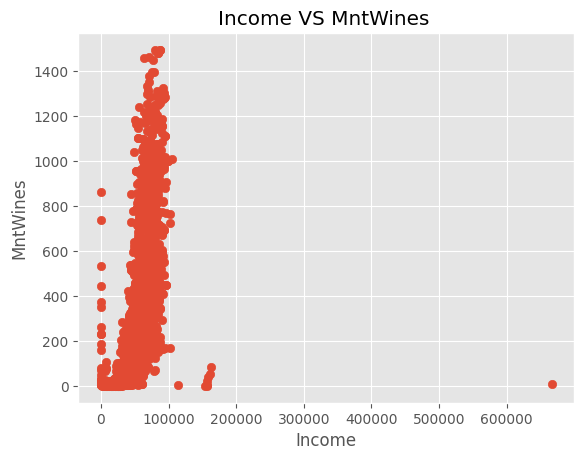

In [31]:
# scatter plot between MntWines and Income
plt.scatter(y=df["MntWines"],x=df["Income"])
plt.xlabel("Income")
plt.ylabel("MntWines")
plt.title("Income VS MntWines ")
plt.show()

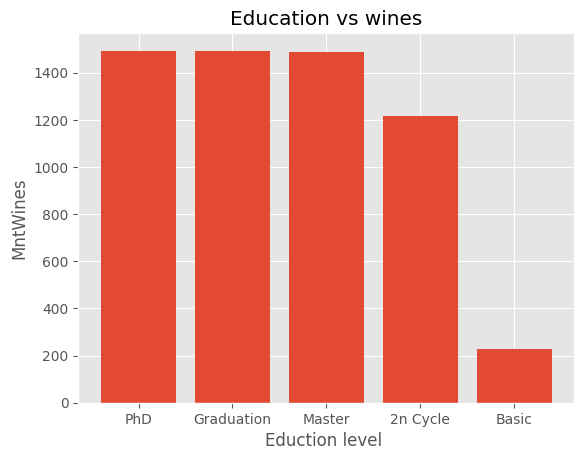

In [50]:
# education vs MntWines
df_sorted = df.sort_values(by="MntWines", ascending=False)

plt.bar(df_sorted["Education"],df_sorted["MntWines"])
plt.xlabel("Eduction level ")
plt.ylabel("MntWines")
plt.title("Education vs wines")
plt.show()

In [43]:
# Getting the Marital Status which buys high MntWines
df.groupby("Marital_Status")["MntWines"].sum().sort_values(ascending=False)

Marital_Status
Married     258751
Together    177959
Single      138399
Divorced     75364
Widow        28434
Absurd         711
YOLO           644
Alone          554
Name: MntWines, dtype: int64

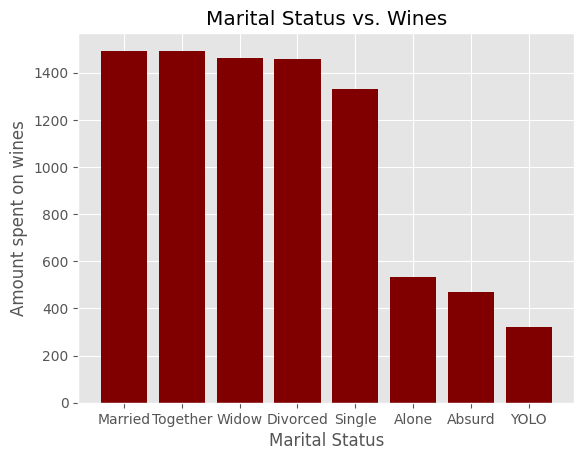

In [48]:
# setting the graph
df_sorted = df.sort_values(by="MntWines", ascending=False)

plt.bar(df_sorted["Marital_Status"], df_sorted["MntWines"], color="maroon")
plt.xlabel("Marital Status")
plt.ylabel("Amount spent on wines")
plt.title("Marital Status vs. Wines")
plt.show()


# # Customer overall all analysis

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2237 non-null   int64 
 1   Year_Birth           2237 non-null   int64 
 2   Education            2237 non-null   object
 3   Marital_Status       2237 non-null   object
 4   Income               2237 non-null   int64 
 5   Kidhome              2237 non-null   int64 
 6   Teenhome             2237 non-null   int64 
 7   Dt_Customer          2237 non-null   object
 8   Recency              2237 non-null   int64 
 9   MntWines             2237 non-null   int64 
 10  MntFruits            2237 non-null   int64 
 11  MntMeatProducts      2237 non-null   int64 
 12  MntFishProducts      2237 non-null   int64 
 13  MntSweetProducts     2237 non-null   int64 
 14  MntGoldProds         2237 non-null   int64 
 15  NumDealsPurchases    2237 non-null   int64 
 16  NumWeb

In [64]:
# customer who buy Mnt Wines customers who accepted all three campaigns
mask = (df["AcceptedCmp1"] == 1) & (df["AcceptedCmp2"] == 1) & (df["AcceptedCmp3"] == 1)

# apply the mask to the dataframe to extract the rows with the desired data
customers_accepted_all = df[mask]

# group the resulting DataFrame by a column and perform aggregation
customers_grouped = customers_accepted_all.groupby(["Marital_Status,Mnt"])["MntWines"].sum()
customers_grouped


Marital_Status
Married    2134
Single      162
Name: MntWines, dtype: int64

Text(0, 0.5, 'Marital Status')

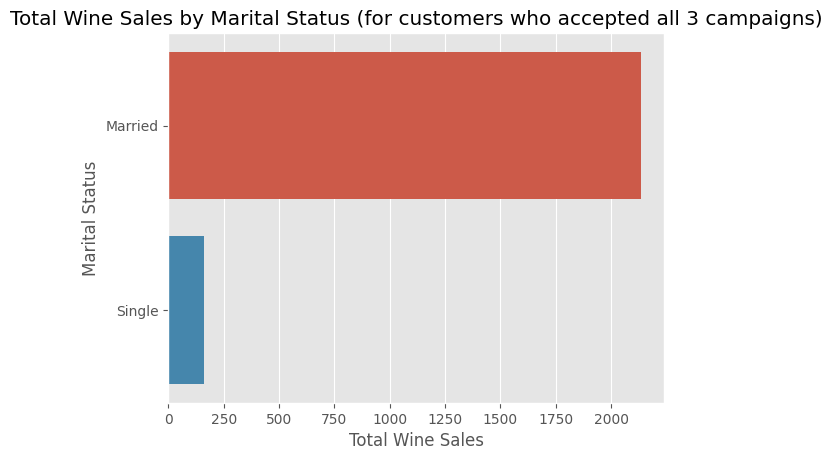

In [65]:
# create a bar plot using seaborn
sns.barplot(x=customers_grouped.values, y=customers_grouped.index)

# customize the plot
plt.title("Total Wine Sales by Marital Status (for customers who accepted all 3 campaigns)")
plt.xlabel("Total Wine Sales")
plt.ylabel("Marital Status")

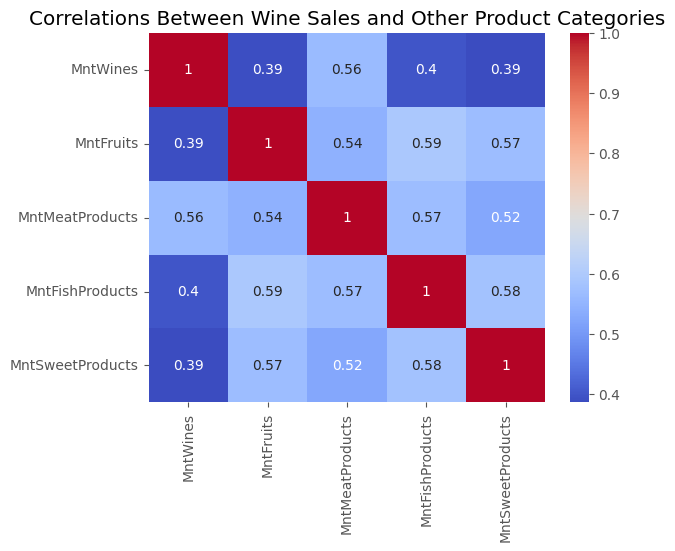

In [66]:
# Knowing the correlation of Wine with other prodcut means along which products wine sold most or bought by buyers or any other product
# create a new dataframe with the relevant columns
df_products = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]]

# calculate the correlations
corr = df_products.corr()

# plot the correlations using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# customize the plot
plt.title("Correlations Between Wine Sales and Other Product Categories")
plt.show()

1.  **Wines**-This correlation says that people often buy most **wines** along **meat** products then with **sweet** prodcuts lowest is **fish** product
2.  **Fruits**- This correlation says that people often buy most **fruits** along **Fish** products then with **sweet** prodcuts lowest is **wine** product
3. **Meat** -This correlation says that people often buy most **meat** along **fish** products then with **wine** prodcuts lowest is **sweat** product
4. **Fish** - This correlation says that people often buy most **fish** along **fruits** products then with **sweat** prodcuts lowest is **wine** product
5. **Sweat**-This correlation says that people often buy most **sweat** along **fish** products then with **fruit** prodcuts lowest is **wine** product 

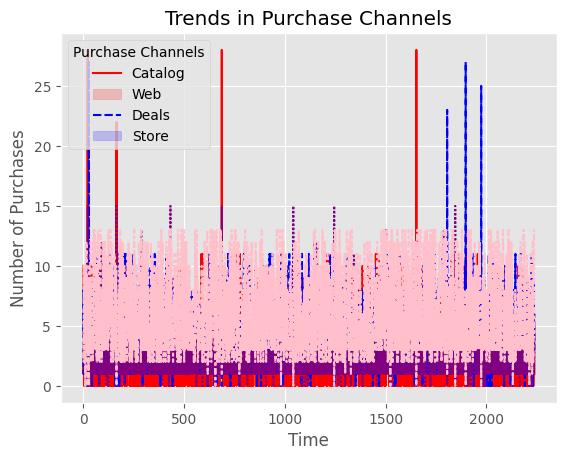

In [71]:
# seaborn lineplot 'Catalog', 'Web', 'Deals', 'Store'
sns.lineplot(data=df[['NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'NumStorePurchases']],palette=['red', 'blue', 'purple', 'pink'])

# customize the plot
plt.title("Trends in Purchase Channels")
plt.xlabel("Time")
plt.ylabel("Number of Purchases")
plt.legend(title="Purchase Channels", loc="upper left", labels=['Catalog', 'Web', 'Deals', 'Store'])
plt.show()

In [72]:
# average value of web purchases
df["NumWebPurchases"].mean()

4.084821428571429

In [78]:
#Education level and complain 
complains=df.groupby("Education")["Complain"].sum().sort_values(ascending=False)
complains

Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Basic          0
Name: Complain, dtype: int64

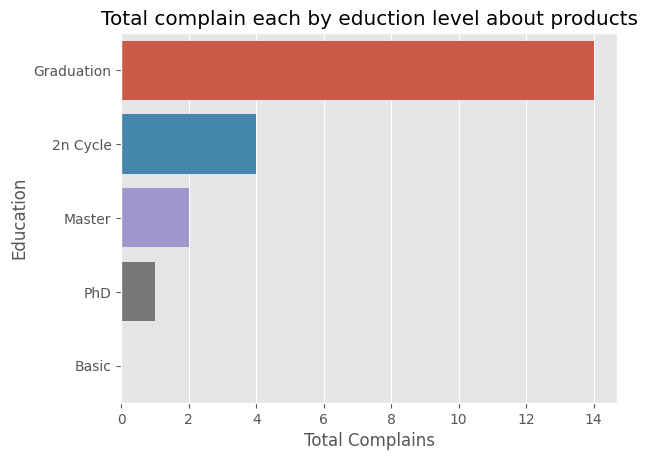

In [77]:
# create a bar plot using seaborn
sns.barplot(x=complains.values, y=complains.index)

# customize the plot
plt.title("Total complain by each eduction level about products")
plt.xlabel("Total Complains")
plt.ylabel("Education")
plt.show()

In [83]:
# Recency by each group of Marital_status
recency=df.groupby("Marital_Status")["Recency"].sum().sort_values(ascending=False)
recency

Marital_Status
Married     41712
Together    29062
Single      23763
Divorced    11481
Widow        3784
Absurd        106
Alone          91
YOLO            6
Name: Recency, dtype: int64

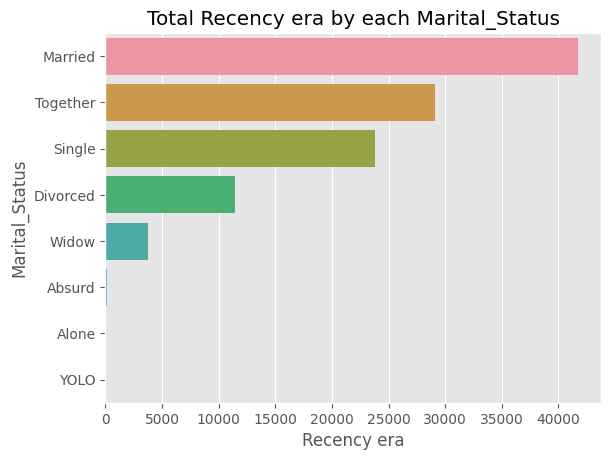

In [87]:
# create a bar plot using seaborn
sns.barplot(x=recency.values, y=recency.index)

# customize the plot
plt.title("Total Recency era by each Marital_Status")
plt.xlabel("Recency era")
plt.ylabel("Marital_Status")
plt.show()

In [94]:
#Avg web visits last month
df["NumWebVisitsMonth"].mean()

5.316517857142857

In [101]:
#LAST EACH PERSON EDUCATION LEVEL web visits last month
NumWebVisits=df.groupby("Education")["NumWebVisitsMonth"].sum().sort_values(ascending=False)
NumWebVisits

Education
Graduation    5959
PhD           2556
Master        1916
2n Cycle      1107
Basic          371
Name: NumWebVisitsMonth, dtype: int64

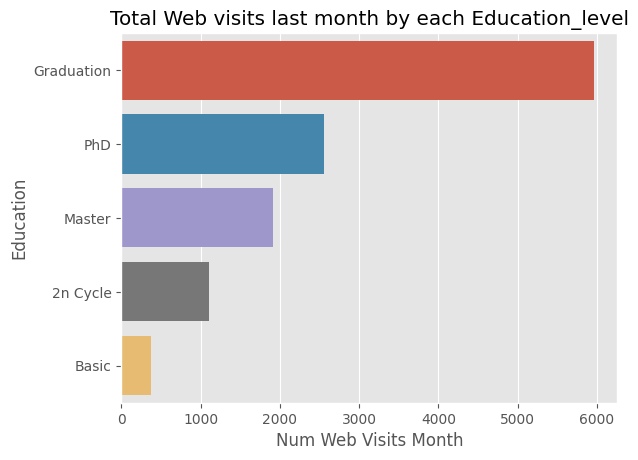

In [102]:
# create a bar plot using seaborn
sns.barplot(x=NumWebVisits.values, y=NumWebVisits.index)

# customize the plot
plt.title("Total Web visits last month by each Education_level")
plt.xlabel("Num Web Visits Month")
plt.ylabel("Education")
plt.show()

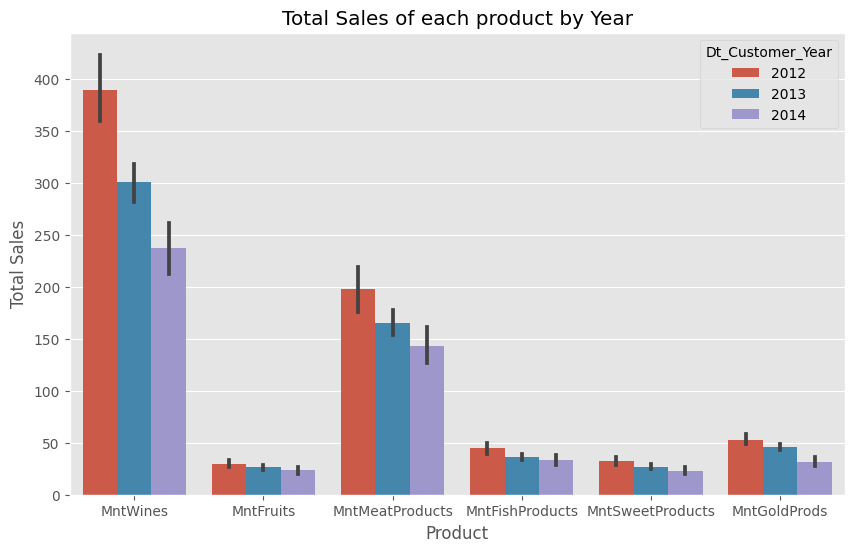

<Figure size 2000x500 with 0 Axes>

In [135]:
# select the relevant columns from the dataframe
#Total Sales of each product by Year

# create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# select the relevant columns from the dataframe
df_selected = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Dt_Customer_Year"]]

# melt the dataframe to create a long-form dataframe
df_melted = df_selected.melt(id_vars=["Dt_Customer_Year"], value_vars=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], var_name="Product")

# create the grouped bar chart
sns.barplot(x="Product", y="value", hue="Dt_Customer_Year", data=df_melted, ax=ax)

# customize the plot
plt.title("Total Sales of each product by Year")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.figure(figsize=(20,5))          
plt.show()


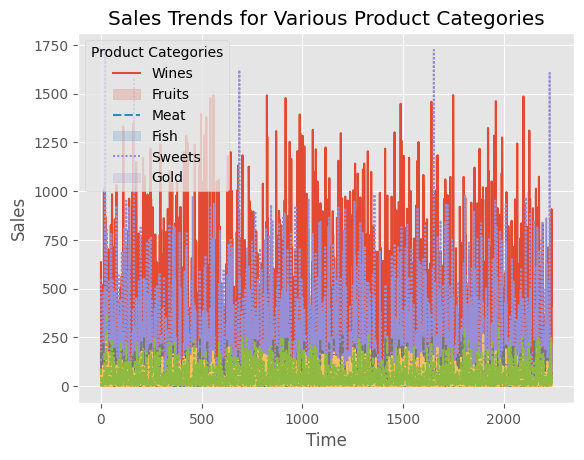

In [108]:
# Sales Trends for Various Product Categories
# create a new dataframe with the relevant columns
df_products = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]]

# plot the data using a line chart
sns.lineplot(data=df_products)

# customize the plot
plt.title("Sales Trends for Various Product Categories")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend(title="Product Categories", loc="upper left", labels=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
plt.show()
